<a href="https://colab.research.google.com/github/RamiAmasha31/ABM-applied_mathmatics/blob/main/Multiple_Strains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Strains

# Parameters

In [133]:
import numpy as np

def random_days1(mean, std):
    return max(0, int(np.random.normal(mean, std)))

num_agents = 500
num_strains = 3
infected_at_start = [1, 1, 1]  # Number of initially infected agents for each strain
infection_params = [(50, 5), (60, 7), (70, 6)]  # (mean, std) for infection periods for each strain
immunity_params = [(100, 10), (90, 8), (110, 12)]  # (mean, std) for immunity periods for each strain
infection_probabilities = [0.5, 0.3, 0.8]
infected_per_birth_duration = [1, 1, 1]
after_recovery_factors = [0.2, 0.6, 0.7]
R0 = [1.5,2, 1.5]
number_of_interactions_per_day_per_agent = 1 / 10

# Loop through each strain's infection parameters
for idx, (mean, std) in enumerate(infection_params):
    TMP = random_days1(mean, std) * number_of_interactions_per_day_per_agent
    infection_probabilities[idx] = float(R0[idx]) / TMP
print(infection_probabilities)
simulation_duration1 = 30000
birth_rate_yearly = 0.3
birth_duration = 365
birth_interval = 365
carrying_capacity = 1000


[0.3333333333333333, 0.3448275862068965, 0.22388059701492538]


#Agent class

In [106]:
import numpy as np
import random

class Agent:
    def __init__(self, num_strains, infection_params, immunity_params,infection_probabilities):
        self.infected = [False] * num_strains  # List to track infection status for each strain
        self.immune = [False] * num_strains  # List to track immunity status for each strain
        self.remaining_days_of_infection = [self.random_days(mean, std) for mean, std in infection_params]
        self.remaining_days_of_immunity = [self.random_days(mean, std) for mean, std in immunity_params]
        self.susceptible = True
        self.infection_probabilities= infection_probabilities
    def random_days(self, mean, std):
        return max(0, int(np.random.normal(mean, std)))


#Picking two random agents

In [107]:
import random
def PickTwoAgentsWithContacts(numAgents):
    """
    Randomly selects two different agent indices from the range [0, numAgents-1]
    with a probability of being in contact.

    Parameters:
    - numAgents (int): The total number of agents.
    - contact_prob (float): The probability of two agents being in contact.

    Returns:
    - tuple: A tuple containing two distinct agent indices.
    """
    # Randomly select two initial indices
    index1 = random.randint(0, numAgents - 1)
    index2 = random.randint(0, numAgents - 1)

    # Ensure the selected indices are different
    while index1 == index2 :
        index1 = random.randint(0, numAgents - 1)
        index2 = random.randint(0, numAgents - 1)

    return index1, index2

## `start_step` Function

The `start_step` function initializes a list of agents with specified infection and immunity parameters and infects a subset of agents at the beginning of the simulation.

### Parameters

- `number_of_agents` (int): Total number of agents in the simulation.
- `num_strains` (int): Number of different strains that agents can be infected with.
- `infected_at_start` (list): List where each element indicates the number of initially infected agents for each strain.
- `infection_params` (list): List of tuples `(mean, std)` specifying the mean and standard deviation of infection durations for each strain.
- `immunity_params` (list): List of tuples `(mean, std)` specifying the mean and standard deviation of immunity durations for each strain.

### Returns

- `agents` (list): List of `Agent` objects representing the initialized agents with their initial infection and immunity statuses.


In [108]:
import numpy as np
import random


def start_step(number_of_agents, num_strains, infected_at_start, infection_params, immunity_params,infection_probabilities):
    if sum(infected_at_start) > number_of_agents:
        raise ValueError("Total number of initially infected agents exceeds the total number of agents.")

    agents = []

    # Create agents
    for i in range(number_of_agents):
        agents.append(Agent(num_strains, infection_params, immunity_params,infection_probabilities))

    # Infect agents according to infected_at_start array
    for strain_index in range(num_strains):
        infected_indices = random.sample(range(number_of_agents), infected_at_start[strain_index])
        for index in infected_indices:
            agents[index].infected[strain_index] = True
            agents[index].remaining_days_of_infection[strain_index] = max(0, int(np.random.normal(infection_params[strain_index][0], infection_params[strain_index][1])))
            agents[index].susceptible = False

    return agents

# `infect` Function Logic Explanation

The `infect` function simulates the transmission of infection between two agents (`agent1` and `agent2`) across multiple strains of a disease. Below is a detailed explanation of its logic:

## Parameters

- **`agent1` and `agent2`**: Objects representing individual agents in the simulation.
- **`infection_probabilities`**: A list containing infection probabilities for each strain.
- **`infection_mean` and `infection_std`**: Lists containing the mean and standard deviation of infection durations for each strain.

## Function Execution

### Iteration Over Strains

The function iterates through each strain using `range(len(infection_probabilities))`.

### Infection Conditions

For each strain (`strain_index`), the function checks the following conditions:

- `not agent1.infected[strain_index]`: Ensures that `agent1` is not already infected with the current strain.
- `agent2.infected[strain_index]`: Checks if `agent2` is infected with the current strain.
- `not agent1.immune[strain_index]`: Ensures that `agent1` is not immune to the current strain.
- `random_number < infection_probabilities[strain_index]`: Compares a randomly generated number (`random_number`) with the infection probability (`infection_probabilities[strain_index]`) for the current strain.

### Infect `agent1`

If all conditions are met for a strain (`strain_index`), `agent1` is infected with the current strain:

- `agent1.infected[strain_index] = True`: Sets the infection status of `agent1` for the current strain to `True`.
- `agent1.remaining_days_of_infection[strain_index] = int(np.random.normal(infection_mean[strain_index], infection_std[strain_index]))`: Sets the remaining days of infection for `agent1` based on a random duration generated from a normal distribution with `infection_mean` and `infection_std` for the current strain.
- `agent1.susceptible = False`: Marks `agent1` as not susceptible to further infection for the current strain.

### Infect `agent2`

Similarly, if `agent2` meets the infection conditions (in reverse):

- `agent2.infected[strain_index] = True`: Sets the infection status of `agent2` for the current strain to `True`.
- `agent2.remaining_days_of_infection[strain_index] = int(np.random.normal(infection_mean[strain_index], infection_std[strain_index]))`: Sets the remaining days of infection for `agent2` based on a random duration generated from a normal distribution.
- `agent2.susceptible = False`: Marks `agent2` as not susceptible to further infection for the current strain.

## Return Values

The function returns updated `agent1` and `agent2` objects after potentially modifying their infection status for each strain.

## Summary

The `infect` function serves to simulate disease transmission by evaluating infection probabilities across multiple strains between two agents. It ensures that infection occurs based on specified conditions and random durations, thereby influencing the state of each agent in the simulation according to the dynamics of disease transmission.


In [109]:
import random
import numpy as np

def infect(agent1, agent2, infection_probabilities):
    for strain_index in range(len(infection_probabilities)):
        random_number = random.random()
        if not agent1.infected[strain_index] and agent2.infected[strain_index] and not agent1.immune[strain_index] and random_number < agent1.infection_probabilities[strain_index]:
            agent1.infected[strain_index] = True
            agent1.remaining_days_of_infection[strain_index] =max(0, int(np.random.normal(infection_params[strain_index][0], infection_params[strain_index][1])))
            agent1.susceptible = False
        elif not agent2.infected[strain_index] and agent1.infected[strain_index] and not agent2.immune[strain_index] and random_number < agent2.infection_probabilities[strain_index]:
            agent2.infected[strain_index] = True
            agent2.remaining_days_of_infection[strain_index] = max(0, int(np.random.normal(infection_params[strain_index][0], infection_params[strain_index][1])))
            agent2.susceptible = False

    return agent1, agent2


#Birth And Death

In [110]:
import numpy as np

def Birth_death(agents, birth_pulse, birth_rate_yearly, birth_interval, birth_duration, new_born, deads,carrying_capacity):
    num_new_agents = 0
    num_dead_agents = 0
    b = 0.1
    m=(birth_rate_yearly-b)/int(carrying_capacity)



    # Check if the birth pulse matches the birth interval
    if birth_pulse % birth_interval < birth_duration:
        # Calculate the expected number of new agents over the birth duration
        expected_new_agents_over_duration = birth_rate_yearly * len(agents)

        # Generate the number of new agents using Poisson distribution
        num_new_agents = np.random.poisson(expected_new_agents_over_duration/birth_duration)

        # Create new agents with the specified parameters
        agents = create_new_agents(agents, num_new_agents, infected_per_birth_duration, infection_params, immunity_params, infection_probabilities)

    # Calculate daily death rate
    death_rate = m * len(agents) + b

    daily_death_rate=death_rate/birth_interval


    # Generate the number of dead agents using binomial distribution
    num_dead_agents = np.random.binomial(len(agents), daily_death_rate)

    # Remove dead agents
    agents = remove_dead_agents(agents, num_dead_agents)

    return agents, num_new_agents, num_dead_agents

In [111]:
def remove_dead_agents(agents, num_dead_agents):
    if num_dead_agents >= len(agents):
        agents.clear()
    else:
        for _ in range(num_dead_agents):
            index = random.randint(0, len(agents) - 1)
            agents.pop(index)
    return agents


In [112]:
import numpy as np

def create_new_agents(agents, num_new_agents, infected_per_birth_duration, infection_params, immunity_params, infection_probabilities):
    num_strains = len(infection_params)  # Assuming all agents have the same number of strains

    if len(infected_per_birth_duration) != num_strains:
        raise ValueError("Length of infected_per_birth_duration must match the number of strains.")

    for i in range(num_new_agents):
        new_agent = Agent(num_strains, infection_params, immunity_params, infection_probabilities)

        for strain_index in range(num_strains):
            if i < infected_per_birth_duration[strain_index]:
                new_agent.infected[strain_index] = True

        agents.append(new_agent)

    return agents


# Updating parameters method

In [122]:
import numpy as np

def update_params(agents):
    num_strains = len(agents[0].infected)  # Assuming all agents have the same number of strains

    Overall_infected = [0] * num_strains  # List to track infected agents for each strain
    susceptibles = 0

    for agent in agents:
        for strain_index in range(num_strains):
            if agent.infected[strain_index]:
                # If the agent is infected with the current strain
                agent.remaining_days_of_infection[strain_index] -= 1

                if agent.remaining_days_of_infection[strain_index] < 0:
                    # The agent has ended the duration of infection for the current strain
                    agent.infected[strain_index] = False
                    agent.immune[strain_index] = True
                    agent.remaining_days_of_immunity[strain_index] =  np.random.normal(immunity_params[strain_index][0], immunity_params[strain_index][1])

            elif agent.immune[strain_index]:
                # The agent is immune to the current strain
                agent.remaining_days_of_immunity[strain_index] -= 1

                if agent.remaining_days_of_immunity[strain_index] < 0:    ### end of reecovery we need to update the infection probability array
                    # The agent has ended the immunity duration for the current strain
                    agent.immune[strain_index] = False
                    agent.susceptible = True
                    for idx in range(len(agent.infection_probabilities)):
                        if idx != strain_index:
                           agent.infection_probabilities[idx] *= after_recovery_factors[strain_index]
        # Count overall infected and susceptibles across all strains for the agent
        for strain_index in range(num_strains):
            if agent.infected[strain_index]:
                Overall_infected[strain_index] += 1
            if agent.susceptible:
                susceptibles += 1

    return agents, Overall_infected, susceptibles


# Simulation

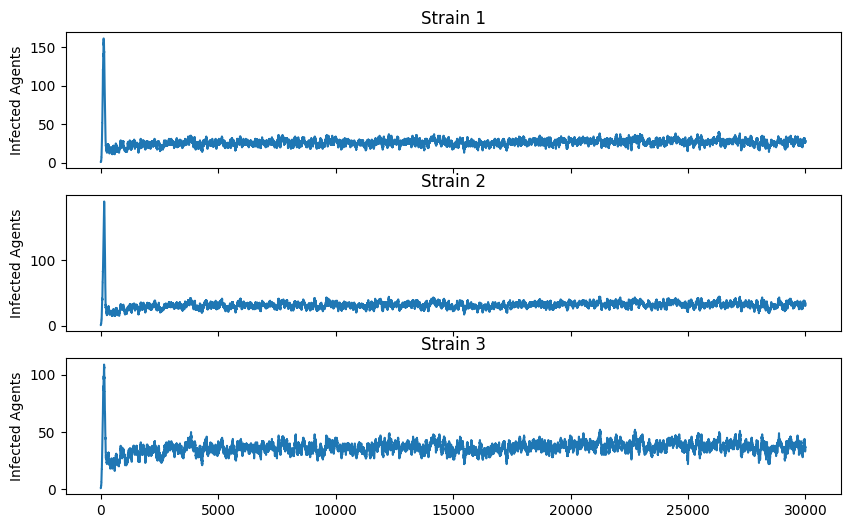

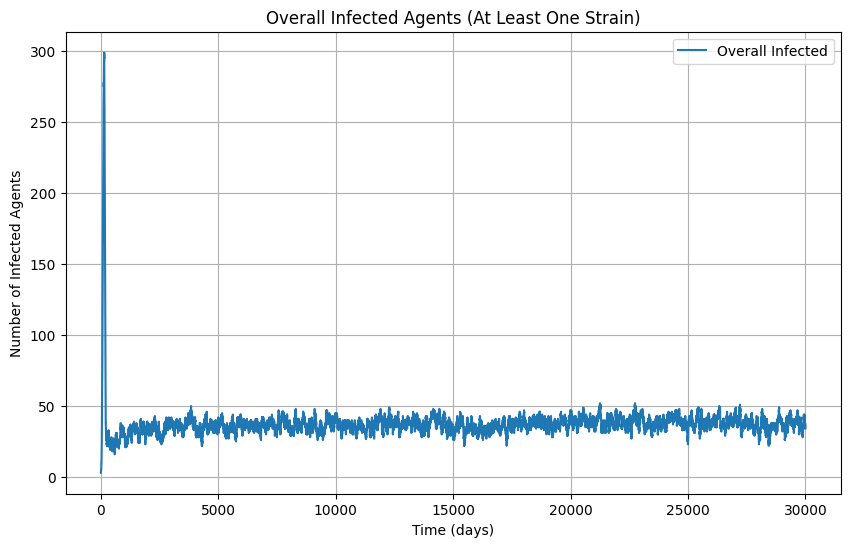

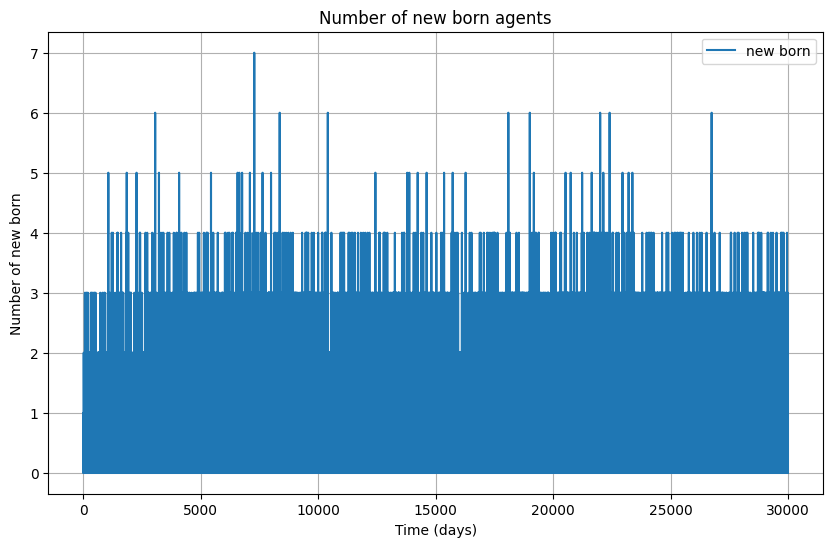

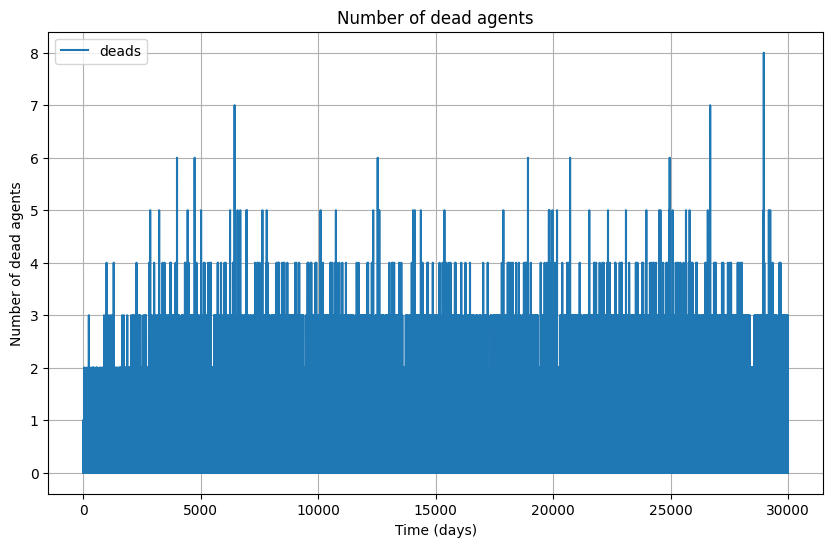

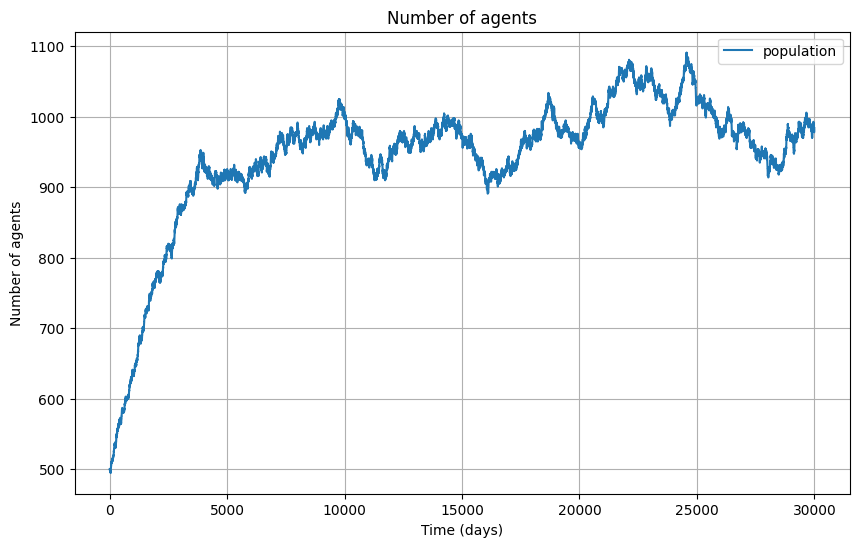

In [134]:
import matplotlib.pyplot as plt

agents = start_step(num_agents, num_strains, infected_at_start, infection_params, immunity_params, infection_probabilities)
number_of_interactions_per_day = int(len(agents) * number_of_interactions_per_day_per_agent // 2)
birth_pulse = 0
new_born = [0] * int(simulation_duration1)
deads = [0] * int(simulation_duration1)
population=[0] * int(simulation_duration1)
# Lists to store infected counts for each strain and overall infected counts
overAll_infected = [[] for _ in range(num_strains)]  # List to store infected counts for each strain
overall_infected_combined = []  # List to store overall infected counts over time

for i in range(simulation_duration1):
    for j in range(number_of_interactions_per_day):
        index1, index2 = PickTwoAgentsWithContacts(len(agents))
        infect(agents[index1], agents[index2], infection_probabilities)

    birth_pulse += 1
    agents, num_new_agents, num_dead_agents = Birth_death(agents, birth_pulse, birth_rate_yearly, birth_interval, birth_duration, new_born, deads, carrying_capacity)
    deads[i] = num_dead_agents
    new_born[i] = num_new_agents
    population[i]=len(agents)
    # Update agents and get current infected counts for each strain
    agents, overall_infected_current, susceptibles = update_params(agents)

    # Accumulate infected counts for each strain
    for strain_index in range(num_strains):
        overAll_infected[strain_index].append(overall_infected_current[strain_index])

    # Calculate overall infected agents (infected in at least one strain)
    overall_infected_count = sum(1 for agent in agents if any(agent.infected))
    overall_infected_combined.append(overall_infected_count)

# Plotting each strain separately
fig, axes = plt.subplots(num_strains, 1, figsize=(10, 6), sharex=True)
for strain_index in range(num_strains):
    axes[strain_index].plot(range(simulation_duration1), overAll_infected[strain_index], label=f'Strain {strain_index + 1}')
    axes[strain_index].set_ylabel('Infected Agents')
    axes[strain_index].set_title(f'Strain {strain_index + 1}')

# Plotting overall infected agents over time
plt.figure(figsize=(10, 6))
plt.plot(range(simulation_duration1), overall_infected_combined, label='Overall Infected')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected Agents')
plt.title('Overall Infected Agents (At Least One Strain)')
plt.legend()
plt.grid(True)
plt.show()



# Plotting new born agents over time
plt.figure(figsize=(10, 6))
plt.plot(range(simulation_duration1), new_born, label='new born')
plt.xlabel('Time (days)')
plt.ylabel('Number of new born')
plt.title('Number of new born agents')
plt.legend()
plt.grid(True)
plt.show()



# Plotting new born agents over time
plt.figure(figsize=(10, 6))
plt.plot(range(simulation_duration1), deads, label='deads')
plt.xlabel('Time (days)')
plt.ylabel('Number of dead agents')
plt.title('Number of dead agents')
plt.legend()
plt.grid(True)
plt.show()





# Plotting new born agents over time
plt.figure(figsize=(10, 6))
plt.plot(range(simulation_duration1), population, label='population')
plt.xlabel('Time (days)')
plt.ylabel('Number of agents')
plt.title('Number of agents')
plt.legend()
plt.grid(True)
plt.show()
